<a href="https://colab.research.google.com/github/xixiuqi/UNet_firebrand_segmentation/blob/main/characterizes_mask_firebrand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Box 1:
   Size:  9.0 x 5.0
   Angle:  90.0
Box 2:
   Size:  7.0 x 4.0
   Angle:  90.0
Box 3:
   Size:  12.337726593017578 x 5.934603214263916
   Angle:  51.34019088745117
Box 4:
   Size:  5.0 x 3.0
   Angle:  90.0
Box 5:
   Size:  4.0 x 2.0
   Angle:  90.0
Box 6:
   Size:  12.0 x 4.0
   Angle:  90.0
Box 7:
   Size:  11.0 x 4.0
   Angle:  90.0
Box 8:
   Size:  13.0 x 2.0
   Angle:  90.0
Box 9:
   Size:  9.0 x 5.0
   Angle:  90.0
Box 10:
   Size:  8.0 x 5.0
   Angle:  90.0
Box 11:
   Size:  8.0 x 4.0
   Angle:  90.0
Box 12:
   Size:  10.0 x 5.0
   Angle:  90.0
Box 13:
   Size:  14.0 x 7.0
   Angle:  90.0
Box 14:
   Size:  6.0 x 3.0
   Angle:  90.0
Box 15:
   Size:  5.52157735824585 x 17.337753295898438
   Angle:  6.34019136428833
Box 16:
   Size:  10.049270629882812 x 2.981651544570923
   Angle:  83.6598129272461
Box 17:
   Size:  13.0 x 6.0
   Angle:  90.0
Box 18:
   Size:  11.039091110229492 x 3.5970072746276855
   Angle:  82.87498474121094
Box 19:
   Size:  8.0 x 4.0
   Angle:  90.0
B

<ipython-input-7-03d90060e019>:27: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


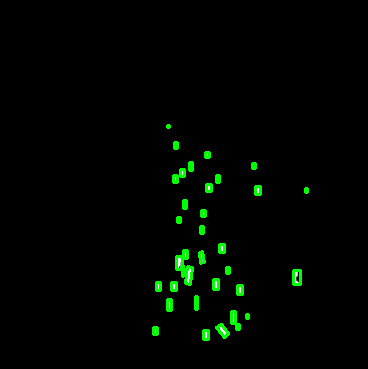

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the input image
image = cv2.imread('test.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize counters
box_count = 0

# Open a file to write box information
with open('box_info.txt', 'w') as file:
    # Iterate through contours
    for contour in contours:
        # Compute the minimum bounding box
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # Calculate box parameters
        (x, y), (width, height), angle = rect

        # Print box number, size, and angle
        print(f"Box {box_count + 1}:")
        print("   Size: ", width, "x", height)
        print("   Angle: ", angle)

        # Write box information to the file
        file.write("{} {} {}\n".format(width, height, angle))

        # Increment box counter
        box_count += 1

        # Draw the bounding box on the original image
        cv2.drawContours(image, [box], 0, (0, 255, 0), 2)

# Display the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
